In [1]:
# Import dependencies
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read in data
cleaned_df = pd.read_csv("Data/survey_df.csv")
cleaned_df

,id,Age,Gender,Country,state,self_employed,family_history,treatment,remote_work,tech_company
0,0,37,Female,United States,IL,No,No,Yes,No,Yes
1,1,44,Male,United States,IN,No,No,No,No,No
2,2,32,Male,Others,Non US,No,No,No,No,Yes
3,3,31,Male,Others,Non US,No,Yes,Yes,No,Yes
4,4,31,Male,United States,TX,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...
1238,1254,26,Male,Others,Non US,No,No,Yes,No,Yes
1239,1255,32,Male,United States,IL,No,Yes,Yes,Yes,Yes
1240,1256,34,Male,United States,CA,No,Yes,Yes,No,Yes
1241,1257,46,Female,United States,NC,No,No,No,Yes,Yes


In [3]:
cleaned_df.drop(columns=["state", "id"])

,Age,Gender,Country,self_employed,family_history,treatment,remote_work,tech_company
0,37,Female,United States,No,No,Yes,No,Yes
1,44,Male,United States,No,No,No,No,No
2,32,Male,Others,No,No,No,No,Yes
3,31,Male,Others,No,Yes,Yes,No,Yes
4,31,Male,United States,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...
1238,26,Male,Others,No,No,Yes,No,Yes
1239,32,Male,United States,No,Yes,Yes,Yes,Yes
1240,34,Male,United States,No,Yes,Yes,No,Yes
1241,46,Female,United States,No,No,No,Yes,Yes


In [4]:
cleaned_df["Country"] = cleaned_df["Country"].map({"United States":1, "Others":0})
cleaned_df["Country"].value_counts()

1    737
0    506
Name: Country, dtype: int64

In [5]:
cleaned_df["self_employed"] = cleaned_df["self_employed"].map({"Yes":1, "No":0})
cleaned_df["self_employed"].value_counts()

0    1101
1     142
Name: self_employed, dtype: int64

In [6]:
cleaned_df["family_history"] = cleaned_df["family_history"].map({"Yes":1, "No":0})
cleaned_df["family_history"].value_counts()

0    759
1    484
Name: family_history, dtype: int64

In [7]:
cleaned_df["remote_work"] = cleaned_df["remote_work"].map({"Yes":1, "No":0})
cleaned_df["remote_work"].value_counts()

0    876
1    367
Name: remote_work, dtype: int64

In [8]:
cleaned_df["tech_company"] = cleaned_df["tech_company"].map({"Yes":1, "No":0})
cleaned_df["tech_company"].value_counts()

1    1018
0     225
Name: tech_company, dtype: int64

In [9]:
# Check to see if dataset is balanced for target class column
cleaned_df["treatment"].value_counts()

Yes    628
No     615
Name: treatment, dtype: int64

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

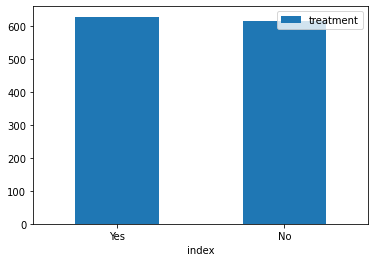

In [10]:
plot_df = pd.DataFrame(cleaned_df["treatment"].value_counts()).reset_index()


ax = plot_df.plot.bar(x='index', y='treatment', rot=0)
ax.bar_label(ax.containers[0], labels=[f"{x/cleaned_df['treatment'].sum():.0%}" for x in cleaned_df['treatment']], padding=-20, color='w', fontsize=14)
plt.show()

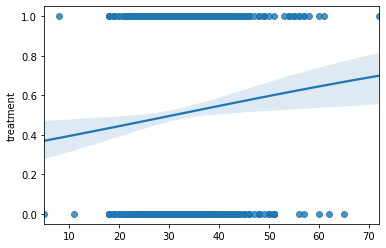

In [11]:
f, ax = plt.subplots()
sns.regplot(x=np.array(cleaned_df["Age"]), y=cleaned_df["treatment"].apply(lambda x: 0 if x=="No" else 1), logistic=True, ax=ax)
plt.show()

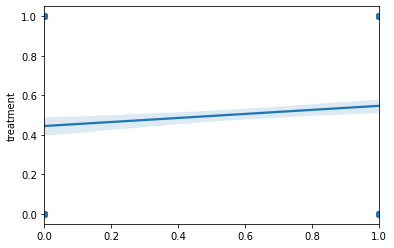

In [17]:
f, ax = plt.subplots()
sns.regplot(x=np.array(cleaned_df["Country"]), y=cleaned_df["treatment"].apply(lambda x: 0 if x=="No" else 1), logistic=True, ax=ax)
plt.show()

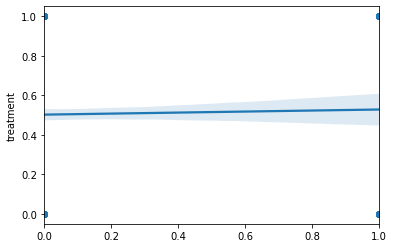

In [12]:
f, ax = plt.subplots()
sns.regplot(x=np.array(cleaned_df["self_employed"]), y=cleaned_df["treatment"].apply(lambda x: 0 if x=="No" else 1), logistic=True, ax=ax)
plt.show()

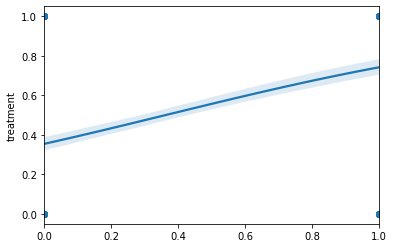

In [13]:
f, ax = plt.subplots()
sns.regplot(x=np.array(cleaned_df["family_history"]), y=cleaned_df["treatment"].apply(lambda x: 0 if x=="No" else 1), logistic=True, ax=ax)
plt.show()

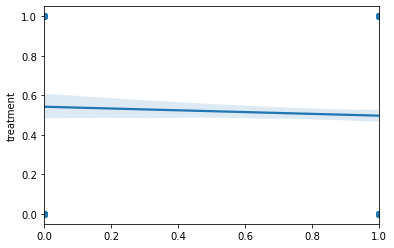

In [14]:
f, ax = plt.subplots()
sns.regplot(x=np.array(cleaned_df["tech_company"]), y=cleaned_df["treatment"].apply(lambda x: 0 if x=="No" else 1), logistic=True, ax=ax)
plt.show()

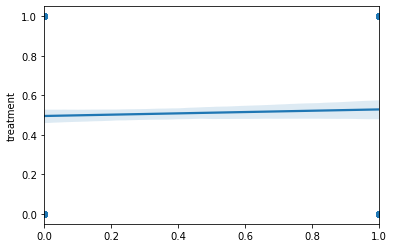

In [15]:
f, ax = plt.subplots()
sns.regplot(x=np.array(cleaned_df["remote_work"]), y=cleaned_df["treatment"].apply(lambda x: 0 if x=="No" else 1), logistic=True, ax=ax)
plt.show()

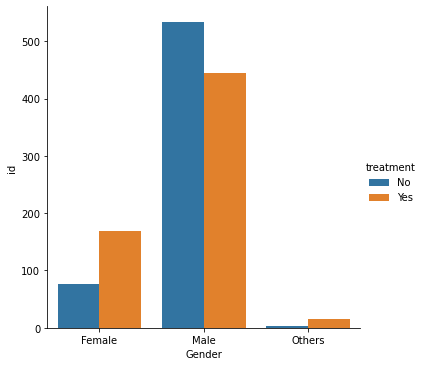

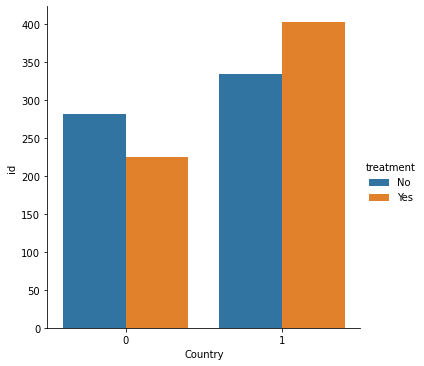

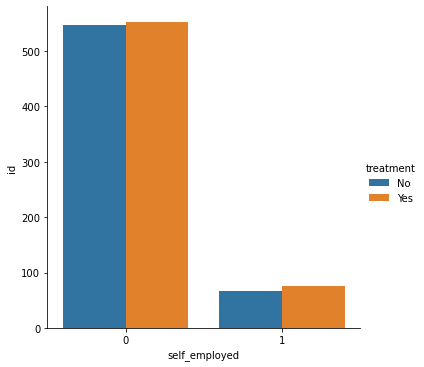

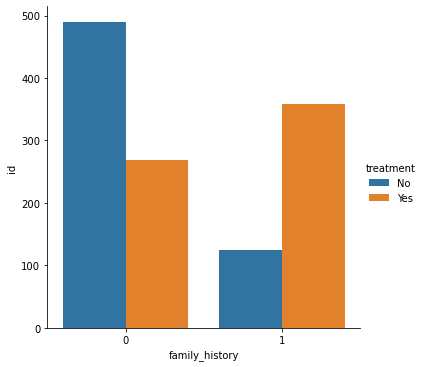

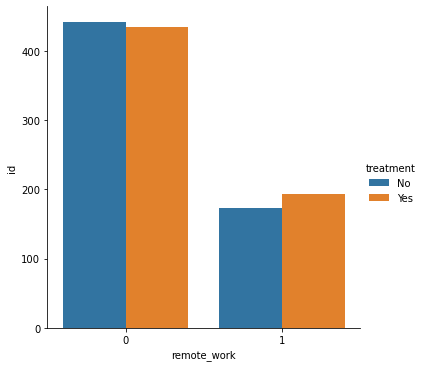

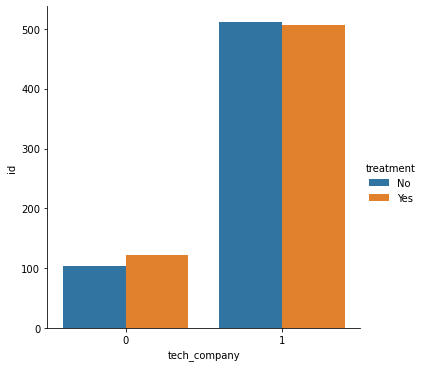

In [16]:
columns = ['Gender', 'Country', 'self_employed', 'family_history', 'remote_work', 'tech_company']

for c in columns:
    
    df_plot = pd.DataFrame(cleaned_df.groupby([c,"treatment"])['id'].count()).reset_index()

    sns.catplot(x = c,       # x variable name
                y = "id",       # y variable name
                hue = "treatment",  # group variable name
                data = df_plot,     # dataframe to plot
                kind = "bar")